In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
tf.random.set_seed(42)
print(tf.__version__)

2.1.0-rc1


In [3]:
import numpy as np
import keras
import h5py
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Data fetching and understand the train/val/test splits.

In [0]:
df = h5py.File('/content/drive/My Drive/great-learning/neural networks/Project 2/SVHN_single_grey1.h5','r+')

In [6]:
df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [0]:
X_test = df['X_test']
X_train = df['X_train']
X_val = df['X_val']
y_test = df['y_test']
y_train = df['y_train']
y_val = df['y_val']

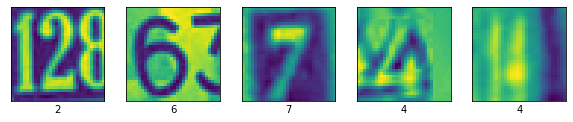

In [8]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [10]:
X_val.shape

(60000, 32, 32)

## Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

## Implement batch normalization for training the neural network 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv1D, Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [0]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Reshape((1024,),input_shape=(32,32,)))

model.add(BatchNormalization())

model.add(Dense(200, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))

model.add(BatchNormalization())

In [0]:
#Adding output layer
model.add(Dense(10, activation='softmax'))

## Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [0]:
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [16]:
model.fit(tf.convert_to_tensor(X_train),y_train_cat,
          validation_data=(tf.convert_to_tensor(X_val),y_val_cat),
          epochs=10,
          batch_size=32) 

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 12s 289us/sample - loss: 1.4181 - accuracy: 0.5316 - val_loss: 0.9644 - val_accuracy: 0.7022
Epoch 2/10
42000/42000 [==============================] - 9s 220us/sample - loss: 1.0078 - accuracy: 0.6814 - val_loss: 0.8013 - val_accuracy: 0.7578
Epoch 3/10
42000/42000 [==============================] - 9s 226us/sample - loss: 0.8806 - accuracy: 0.7221 - val_loss: 0.7062 - val_accuracy: 0.7826
Epoch 4/10
42000/42000 [==============================] - 9s 219us/sample - loss: 0.8179 - accuracy: 0.7426 - val_loss: 0.6327 - val_accuracy: 0.8096
Epoch 5/10
42000/42000 [==============================] - 9s 224us/sample - loss: 0.7658 - accuracy: 0.7576 - val_loss: 0.5755 - val_accuracy: 0.8278
Epoch 6/10
42000/42000 [==============================] - 9s 221us/sample - loss: 0.7344 - accuracy: 0.7680 - val_loss: 0.5538 - val_accuracy: 0.8343
Epoch 7/10
42000/42000 [=========================

## Print the classification accuracy metrics

In [17]:
model.evaluate(tf.convert_to_tensor(X_test),y_test_cat)

18000/18000 [==============================] - 2s 83us/sample - loss: 0.5739 - accuracy: 0.8363


[0.5738721689383189, 0.8362778]